In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msgo
import seaborn as sns
from sklearn.linear_model import LinearRegression
#import geopandas as gpd
import plotly.express as px
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Loading Data

In [2]:
df = pd.read_csv('./covid_vaccination_vs_death_ratio.csv')
df.head()

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40094444.0,1.119552
1,1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40094444.0,1.173083
2,2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40094444.0,1.188112
3,3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40094444.0,1.195607
4,4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40094444.0,1.196111


# Basic Information of Data

In [3]:
df.shape

(20332, 10)

In [4]:
df.describe()

,Unnamed: 0,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
count,20332.000000,2.033200e+04,2.033200e+04,2.033200e+04,20332.000000,2.033200e+04,20332.000000
mean,10165.500000,1.798981e+07,1.155247e+07,6.571098e+06,108.781871,4.863896e+07,29.920624
std,5869.487172,6.328884e+07,4.242151e+07,2.284904e+07,353.037676,1.559664e+08,24.936193
min,0.000000,1.630000e+02,1.620000e+02,1.000000e+00,-41.000000,1.619000e+03,0.003023
25%,5082.750000,4.106325e+05,2.971550e+05,9.506200e+04,1.000000,2.871380e+06,7.197272
50%,10165.500000,2.363600e+06,1.548864e+06,7.438710e+05,10.000000,1.015944e+07,24.266101
75%,15248.250000,1.059296e+07,6.060886e+06,4.137016e+06,58.000000,3.816076e+07,50.225309
max,20331.000000,2.174043e+09,1.100842e+09,1.022207e+09,8786.000000,1.445585e+09,118.567868


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20332 entries, 0 to 20331
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               20332 non-null  int64  
 1   country                  20332 non-null  object 
 2   iso_code                 20332 non-null  object 
 3   date                     20332 non-null  object 
 4   total_vaccinations       20332 non-null  float64
 5   people_vaccinated        20332 non-null  float64
 6   people_fully_vaccinated  20332 non-null  float64
 7   New_deaths               20332 non-null  int64  
 8   population               20332 non-null  float64
 9   ratio                    20332 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.6+ MB


# Dealing with null-values
## missinggo cool tool to visualizing null values

<AxesSubplot:>

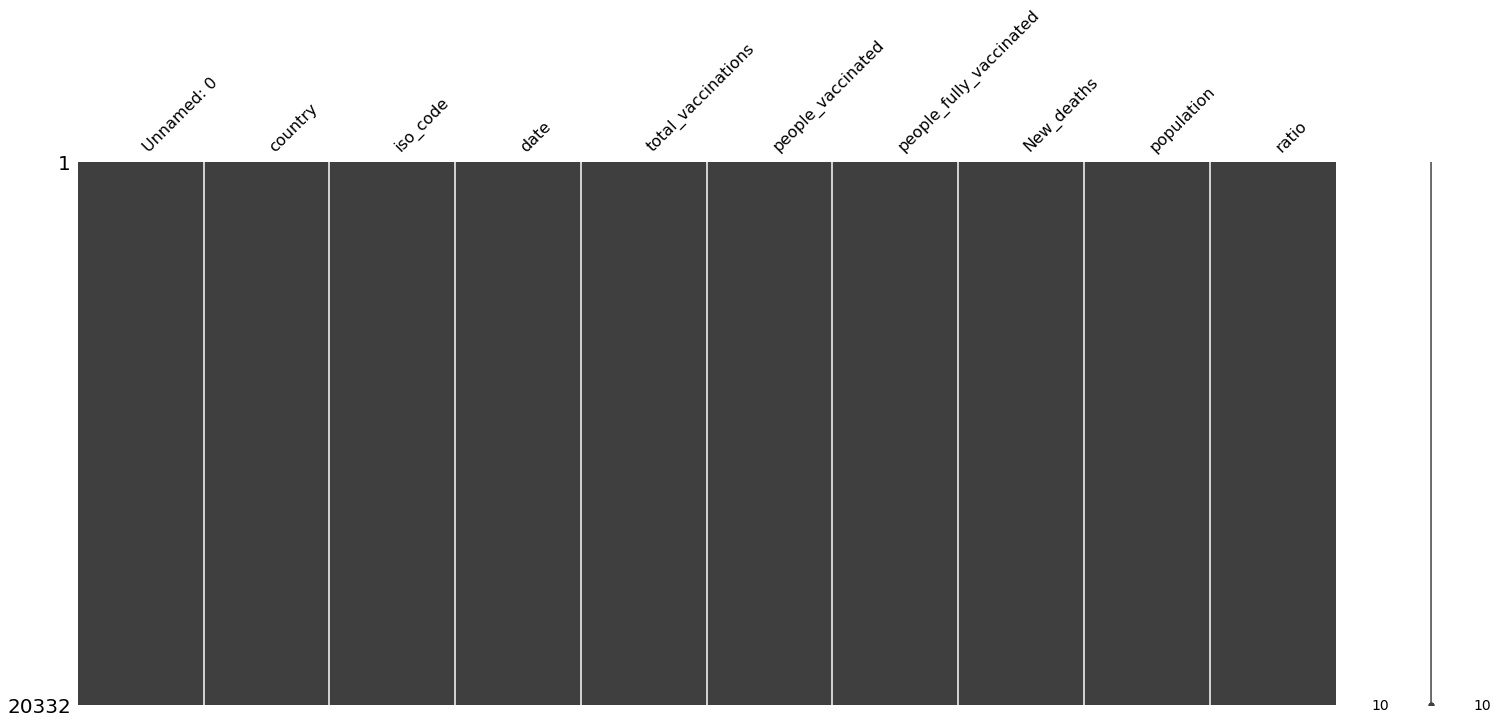

In [6]:
msgo.matrix(df)
#not null,good data!

## Delete Unnamed column

In [8]:
# Control + Alt para comentar todas las filas
#df.columns
#for col in df.columns:
#    if col.startswith('Unnamed'):
#        del df[col]

# Otra forma de eliminar columnas
df = df.drop(['Unnamed: 0'], axis=1)

df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40094444.0,1.119552
1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40094444.0,1.173083
2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40094444.0,1.188112
3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40094444.0,1.195607
4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40094444.0,1.196111


## How many countries do we have here ?

In [9]:
df['country'].unique().shape
#198 countries in this dataset

(198,)

In [10]:
# Another way to show uniques values
df.describe(include='O')

,country,iso_code,date
count,20332,20332,20332
unique,198,198,287
top,Slovenia,SVN,2021-08-16
freq,287,287,112


## Ratio of people fully vaccinated

In [13]:
#total population in this dataset
#total_population = df['population'].unique().sum()
#total_population

# Agrupar datos solo para Chile
grupos = df.groupby('country')
chile = grupos.get_group('Chile')


In [19]:
# Total poblacion de Chile
total_population = chile['population'].unique().sum()
print(f'Total de población: ',total_population)

Total de población:  19242590.0


In [22]:
#'people_fully_vaccinated' is an accumulation variable we need get the maximum value for each country
# and sum them
#df_country = df.groupby('country').agg({'people_fully_vaccinated':max})
#sum_vac_full = df_country['people_fully_vaccinated'].sum()
#sum_vac_full
sum_vac_chile = chile['people_fully_vaccinated'].max() #ultimo dato de personas vacunadas solo para Chile
sum_vac_chile


14213792.0

# Plotting Pie Chart

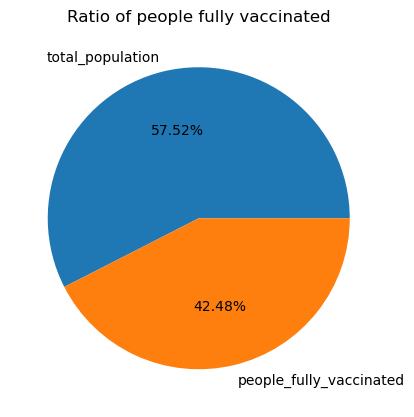

In [25]:
plt.figure(figsize=(10,5),dpi=100)
plt.pie(
    [total_population,sum_vac_chile],
    autopct='%.2F%%',
    labels=['total_population','people_fully_vaccinated'])
plt.title('Ratio of people fully vaccinated')
plt.show()

## Ratio of people vaccinated

In [28]:
#number of people who got at least one shot of COVID vaccine
df_country_vac = df.groupby('country').agg({'people_vaccinated':max}).reset_index()
sum_vac = df_country_vac['people_vaccinated'].sum()
df_country_rat = df.groupby('country').agg({'ratio':max}).reset_index()
df_country_deaths = df.groupby('country').agg({'New_deaths':max}).reset_index()
# df_country_deaths
df_country_rat



,country,ratio
0,Afghanistan,1.921817
1,Albania,33.456108
2,Algeria,13.421745
3,Andorra,70.211363
4,Angola,6.213678
...,...,...
193,Wallis and Futuna,51.189832
194,Yemen,1.004031
195,Zambia,1.630822
196,Zimbabwe,20.858567


In [32]:
sum_vac_chile_1 = chile['people_vaccinated'].max()
chile_rat = chile['ratio'].max()
chile_rat

82.68030966725374

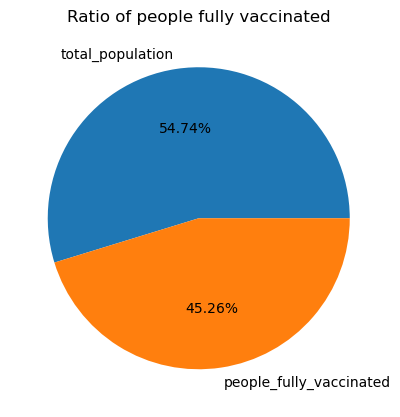

In [51]:
plt.figure(figsize=(10,5),dpi=100)
plt.pie(
    [total_population,sum_vac_chile_1],
    autopct='%.2F%%',
    labels=['total_population','people_fully_vaccinated'])
plt.title('Ratio of people fully vaccinated')
plt.show()

# Grouping Data Times Series

In [52]:
date_group = df.groupby('date').agg('sum').reset_index()
date_group

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,2020-12-27,3.054100e+04,3.052500e+04,1.600000e+01,389,8.601533e+07,0.326443
1,2020-12-28,5.304600e+04,5.290900e+04,8.300000e+01,467,9.474863e+07,0.458105
2,2020-12-29,1.070160e+05,1.061920e+05,7.500000e+02,1046,1.063935e+08,0.603110
3,2020-12-30,1.736070e+05,1.727360e+05,7.950000e+02,1328,1.063935e+08,0.722347
4,2020-12-31,2.257370e+05,2.247770e+05,8.840000e+02,1161,1.063935e+08,0.873954
...,...,...,...,...,...,...,...
282,2021-10-05,3.561082e+09,2.155773e+09,1.399645e+09,6174,4.474918e+09,4947.450160
283,2021-10-06,3.550319e+09,2.147102e+09,1.397401e+09,5390,4.343207e+09,4612.485726
284,2021-10-07,3.614625e+09,2.184253e+09,1.426520e+09,7748,4.740484e+09,4560.839490
285,2021-10-08,3.073474e+09,1.876619e+09,1.197703e+09,6610,3.617768e+09,3624.668259


# Plotting line chart

Text(0.5, 1.0, 'total_vaccinations vs New_deaths')

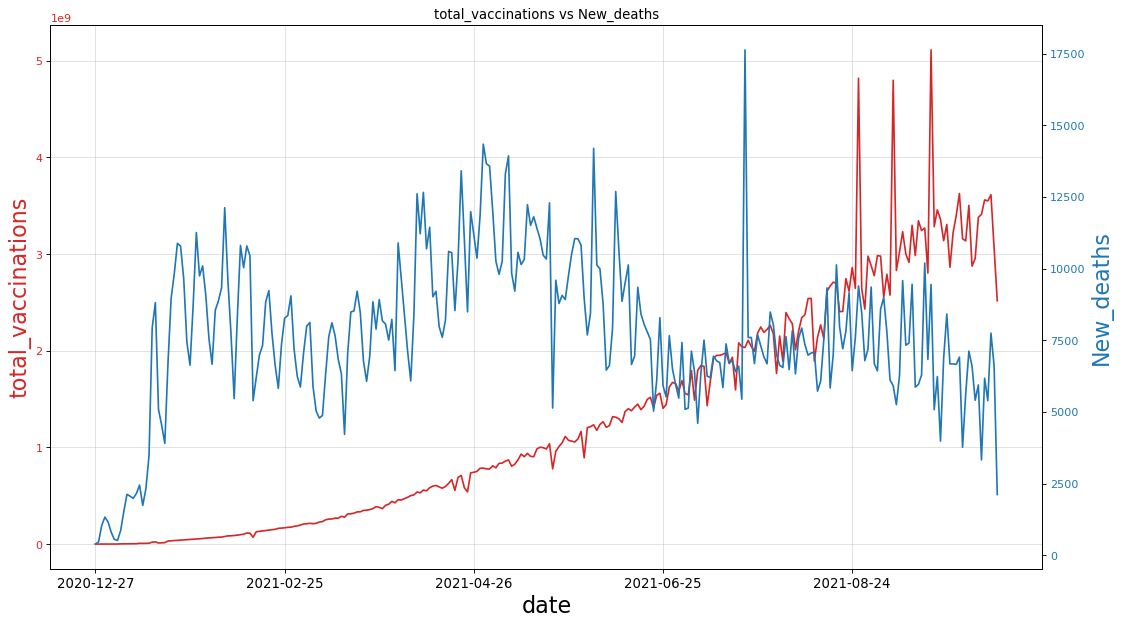

In [53]:
#preparing data
x = date_group['date']
y1 = date_group['total_vaccinations']
y2 = date_group['New_deaths']

#line 1
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x,y1,color='tab:red')

#line 2
ax2 = ax1.twinx()
ax2.plot(x,y2,color='tab:blue')

#decorations line 1
ax1.set_xlabel('date',fontsize=20)
ax1.tick_params(axis='x',rotation=0,labelsize=12)
ax1.set_ylabel('total_vaccinations',color='tab:red',fontsize=20)
ax1.tick_params(axis='y',rotation=0,labelcolor='tab:red')
ax1.grid(alpha=0.4)

#decorations line 2
ax2.set_ylabel('New_deaths',fontsize=20,color='tab:blue')
ax2.tick_params(axis='y',rotation=0,labelcolor='tab:blue')
ax2.set_xticks(np.arange(0,len(x),60))#
ax2.set_title('total_vaccinations vs New_deaths')

#Back to original dateset

# Relationship Between variables (Plotting Heatmap with seaborn)

$$ r(X, Y)=\frac{\operatorname{Cov}(X, Y)}{\sqrt{\operatorname{Var}[X] \operatorname{Var}[Y]}}
$$

In [54]:
df_corr = df.corr()
df_corr

,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
total_vaccinations,1.000000,0.985602,0.948243,0.305047,0.686229,0.170965
people_vaccinated,0.985602,1.000000,0.881845,0.319465,0.744189,0.139677
people_fully_vaccinated,0.948243,0.881845,1.000000,0.259981,0.524252,0.217102
New_deaths,0.305047,0.319465,0.259981,1.000000,0.501012,-0.113327
population,0.686229,0.744189,0.524252,0.501012,1.000000,-0.077156
ratio,0.170965,0.139677,0.217102,-0.113327,-0.077156,1.000000


## Plotting

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'total_vaccinations'),
  Text(0, 1.5, 'people_vaccinated'),
  Text(0, 2.5, 'people_fully_vaccinated'),
  Text(0, 3.5, 'New_deaths'),
  Text(0, 4.5, 'population'),
  Text(0, 5.5, 'ratio')])

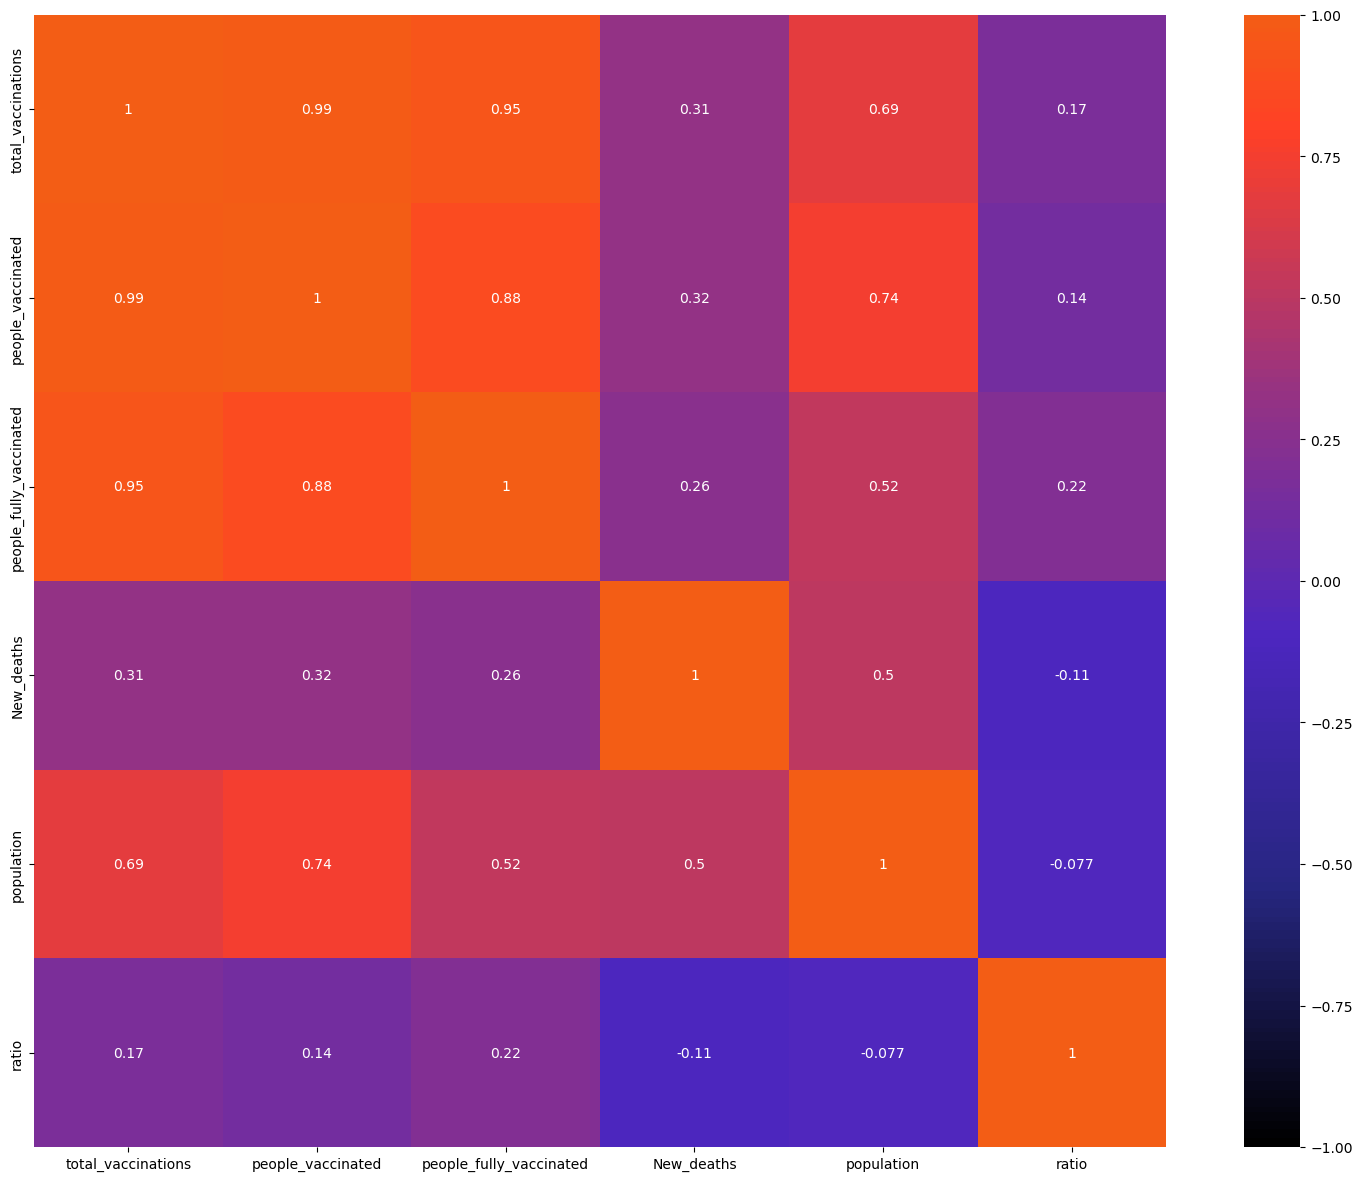

In [22]:
plt.figure(figsize=(20,15),dpi=100)
sns.heatmap(df_corr,annot=True,square=True,vmin=-1,cmap='CMRmap',center=0.8)
plt.yticks(rotation=90)

# Plotting scatter ---> USA

Text(0.5, 1.0, 'ratio vs New_deaths USA')

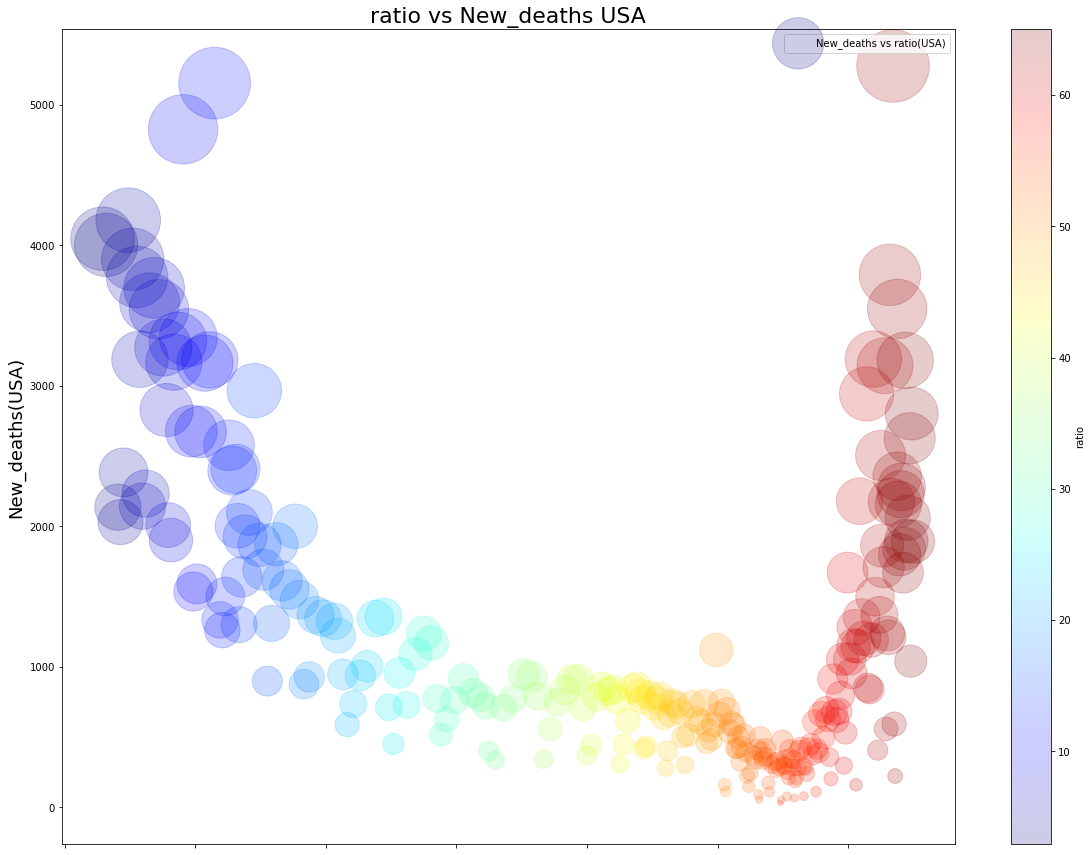

In [23]:
df_usa = df[df['country']=='United States of America']
df_usa.plot(
    kind='scatter',
    x='ratio',
    y='New_deaths',
    label='New_deaths vs ratio(USA)',
    alpha=0.2,
    figsize=(20,15),
    s=df_usa['New_deaths'],
    c='ratio',
    cmap=plt.get_cmap('jet'),
    colorbar=True)

plt.xlabel('ratio(%)',fontsize=15)
plt.ylabel('New_deaths(USA)',fontsize=18)
plt.title('ratio vs New_deaths USA',fontsize=22)
# The radius of each circle represents the district’s population (option s), and the color represents the price (option c).

# Daily World Deaths

In [24]:
date_group
time = date_group['date'].values.tolist()

px.line(x=time,y=date_group['New_deaths'].cumsum())
# In this case New Deaths is a cumulative number so we use function cumsum())

# Machine Learning ：SSSSSimple LinerRegression

In [25]:
# define x,y
x = df_usa[['ratio']]
y = df_usa[['New_deaths']]

# split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

# Standard Normalization(x)
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.fit_transform(x_test)

# Standard Normalization(y)
std_y = StandardScaler()
y_train = std_y.fit_transform(y_train)
y_test = std_y.fit_transform(y_test)

# fitting in
liner = LinearRegression()
liner.fit(x_train,y_train)

# coefficients
print ('Coefficients: ', liner.coef_)
print ('Intercept: ',liner.intercept_)

# prediction
y_pre = std_y.inverse_transform(liner.predict(x_test))# inverse to original value
print('The prediction of New Deaths is :\n',y_pre)

Coefficients:  [[-0.46253682]]
Intercept:  [9.98554033e-17]
The prediction of New Deaths is :
 [[1786.43755105]
 [ 797.74419925]
 [ 672.2953259 ]
 [ 787.54672956]
 [ 707.04351546]
 [ 594.20544557]
 [ 812.00927589]
 [ 892.76273539]
 [1924.15686139]
 [ 804.84418051]
 [1830.28848304]
 [ 699.87543115]
 [1331.69082373]
 [ 729.91362302]
 [ 774.27180134]
 [ 721.93746503]
 [ 623.4098197 ]
 [1941.1430102 ]
 [ 679.28795577]
 [1064.36668375]
 [1017.44110635]
 [ 991.46784356]
 [1863.24713328]
 [ 738.58718978]
 [ 800.69482422]
 [1683.11182917]
 [1354.01957595]
 [1693.33659824]
 [ 857.5213042 ]
 [1882.7654361 ]
 [ 636.2182985 ]
 [ 654.95991144]
 [ 886.2161193 ]
 [1769.25060272]
 [ 756.22926069]
 [1086.36744449]
 [ 703.430835  ]
 [1918.84350489]
 [1021.07919275]
 [1121.18541414]
 [1157.55119144]
 [ 866.61535708]
 [1823.92800581]
 [ 849.14452094]
 [1870.03850379]
 [ 633.92410957]
 [ 900.28826772]
 [1438.58711051]
 [1112.16616575]
 [ 823.17564011]
 [1171.20729657]
 [ 726.01902934]
 [1536.48933843]
 [ 6

## Plotting with regression line

Text(0.5, 1.0, 'Liner Regression')

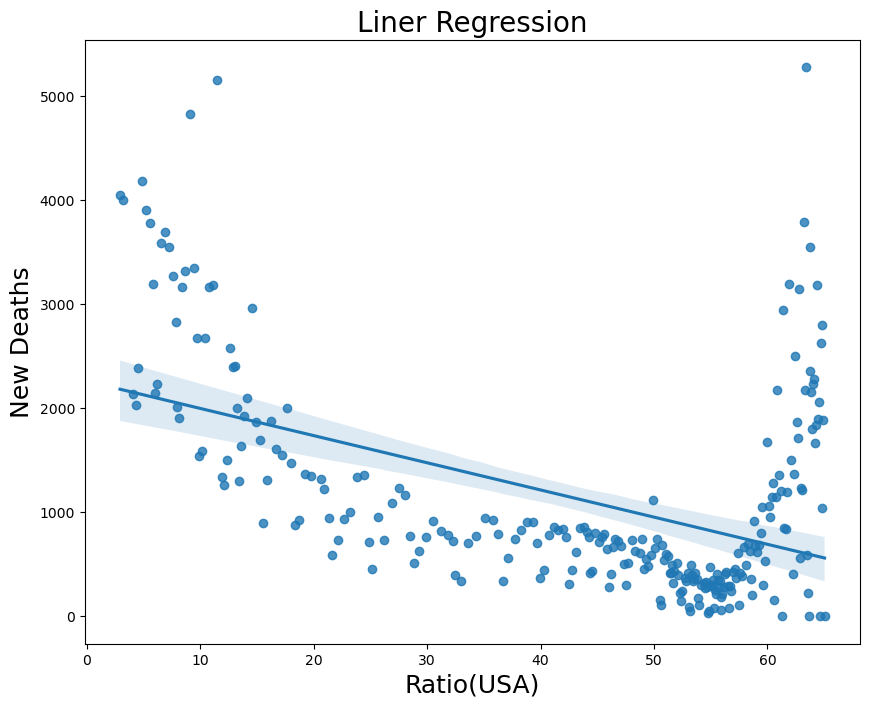

In [26]:
x = df_usa['ratio']
y = df_usa['New_deaths']

plt.figure(figsize=(10,8),dpi=100)
sns.regplot(x=x, y=y)
plt.xlabel('Ratio(USA)',fontsize=18)
plt.ylabel('New Deaths',fontsize=18)
plt.title('Liner Regression',fontsize=20)

# Evaluation : Mean Squared Error(MSE)

$$
M S E=\frac{S S E}{n}=\frac{1}{n} \sum i=1^{m} w i(y i-\hat{y i})^{2}
$$

### The mean squared error (MSE)[1][2] or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. MSE is a risk function, corresponding to the expected value of the squared error loss. ---wiki

In [27]:
mse = mean_squared_error(std_y.inverse_transform(y_test),y_pre)

# make sure the output not show with scientific notation
def as_float(x):
    y='{:.50f}'.format(x)
    return  y

print('The Mean Squared Error(MSE) of y_pre is :',as_float(mse))

The Mean Squared Error(MSE) of y_pre is : 660882.90377080114558339118957519531250000000000000000000


$$
\mathrm{MAE}=\frac{\sum_{i=1}^{n}\left|y_{i}-x_{i}\right|}{n}=\frac{\sum_{i=1}^{n}\left|e_{i}\right|}{n}
$$

### In statistics, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon.---wiki

In [28]:
mae = mean_absolute_error(std_y.inverse_transform(y_test),y_pre)
print('The Mean Absolute Error(MAE) of y_pre is :',as_float(mae))

The Mean Absolute Error(MAE) of y_pre is : 603.07769268033098342129960656166076660156250000000000
